In [19]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append("/home/cgarcia_2002/nHits_count")

import functions_nHits  # Importa la función que necesitas
import importlib

importlib.reload(functions_nHits)

<module 'functions_nHits' from '/home/cgarcia_2002/nHits_count/functions_nHits.py'>

In [ ]:
root_file_path_bkg = "/data/cgarcia_2002/WCTE/data/1766_calib_time/WCTE_offline_R1766S0P0.root"
root_file_path_sig = "/data/cgarcia_2002/WCTE/data/2385_calib_time/WCTE_offline_R2385S0P0.root"

# Open the ROOT file and get the TTree
file_bkg = uproot.open(root_file_path_bkg)
file_sig = uproot.open(root_file_path_sig)

tree_bkg = file_bkg["WCTEReadoutWindows"]  
tree_sig = file_sig["WCTEReadoutWindows"]


11113


In [30]:
values_bkg = tree_bkg["hit_pmt_calibrated_times"].array(library="np")  # e.g., "eventID"
values_sig = tree_sig["hit_pmt_calibrated_times"].array(library="np")  # e.g., "eventID"
values_bkg_cutSignal = values_bkg[:len(values_sig)] #cortamos el background para que tenga la misma longitud que la señal, tantos eventos como la señal

nDetections_event_bkg = []
nDetections_event_sig = []

for x in values_bkg_cutSignal:
    # Elimina los valores > 270000 y calcula la longitud
    #nDetections_event_bkg.append(len([v for v in x if v <= 270000]))
    nDetections_event_bkg.append(len(x)/500)

for x in values_sig:
    nDetections_event_sig.append(len(x)/270)


Text(0.5, 1.0, 'Histogram of Hits per Event')

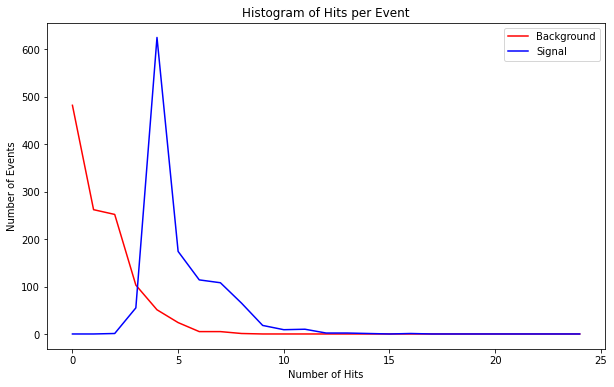

In [31]:

bin_hist = 1

histogram = np.zeros(int(25/bin_hist))  # Initialize histogram with 200 bins
histogram_sig = np.zeros(int(25/bin_hist))  # Initialize histogram with 200 bins

histogram = functions_nHits.count_nHits(np.array(nDetections_event_bkg), bin_hist, histogram)
histogram_sig = functions_nHits.count_nHits(np.array(nDetections_event_sig), bin_hist, histogram_sig)

plt.figure(figsize=(10, 6))
plt.plot(np.arange(0, 25, bin_hist), histogram, label='Background', color='red')
plt.plot(np.arange(0, 25, bin_hist), histogram_sig, label='Signal', color='blue')
plt.legend()
plt.xlabel('Number of Hits')
plt.ylabel('Number of Events')
plt.title('Histogram of Hits per Event')

In [100]:
event_number_branch_sig = tree_sig["event_number"].array(library="np")

bin_hits = 3000
times_array_sig = np.arange(0, 270000+1, bin_hits, dtype=int)
nHits_sig = np.zeros((tree_sig.num_entries, len(times_array_sig)))

for times, event_number in zip(values_sig, event_number_branch_sig):

    nHits_sig[event_number, :] = functions_nHits.count_nHits(times, bin_hits, nHits_sig[event_number, :])

In [102]:
event_number_branch_bkg = tree_bkg["event_number"].array(library="np")

times_array_bkg = np.arange(0, 506000+1, bin_hits, dtype=int)
nHits_bkg = np.zeros((tree_bkg.num_entries, len(times_array_bkg)))

for times, event_number in zip(values_bkg, event_number_branch_bkg):

    nHits_bkg[event_number, :] = functions_nHits.count_nHits(times, bin_hits, nHits_bkg[event_number, :])

(1185, 91)
(11113, 169)


Text(0.5, 0, 'Tiempo (ns)')

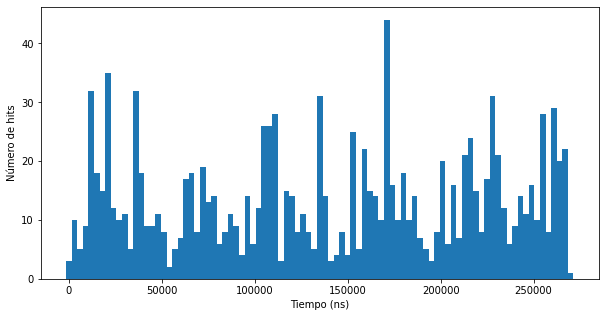

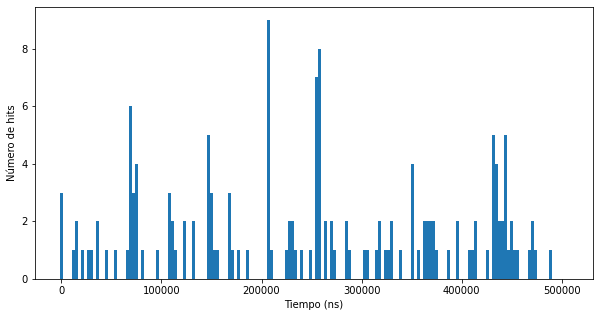

In [103]:
print(nHits_sig.shape)
print(nHits_bkg.shape)

plt.figure(figsize=(10, 5))
plt.bar(times_array_sig, nHits_sig[0,::], width=bin_hits)
plt.ylabel('Número de hits')
plt.xlabel('Tiempo (ns)')

plt.figure(figsize=(10, 5))
plt.bar(times_array_bkg, nHits_bkg[0,::], width=bin_hits)
plt.ylabel('Número de hits')
plt.xlabel('Tiempo (ns)')

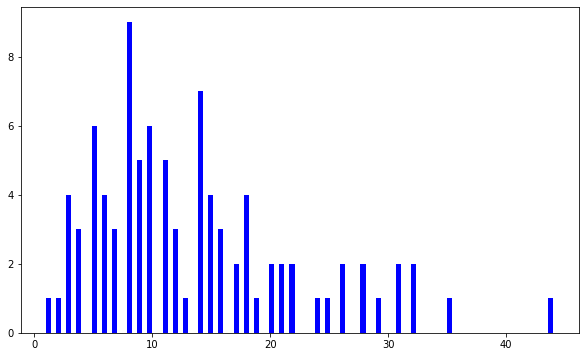

In [104]:
plt.figure(figsize=(10, 6))
plt.hist(nHits_sig[0,::], bins=100, label='Signal', color='blue')
plt.show()


In [105]:
bin_hist = 100

hist_nHits_sig = np.zeros(int(5000/bin_hist))
hist_nHits_bkg = np.zeros(int(5000/bin_hist))


event_number_branch_sig = tree_sig["event_number"].array(library="np")
event_number_branch_bkg = tree_bkg["event_number"].array(library="np")

for event in event_number_branch_sig:
    hist_nHits_sig = functions_nHits.count_nHits(nHits_sig[event, :], bin_hist, hist_nHits_sig)

for event in event_number_branch_bkg:
    hist_nHits_bkg = functions_nHits.count_nHits(nHits_bkg[event, :], bin_hist, hist_nHits_bkg)


In [106]:
print(hist_nHits_bkg.shape)
print(hist_nHits_sig.shape)

(50,)
(50,)


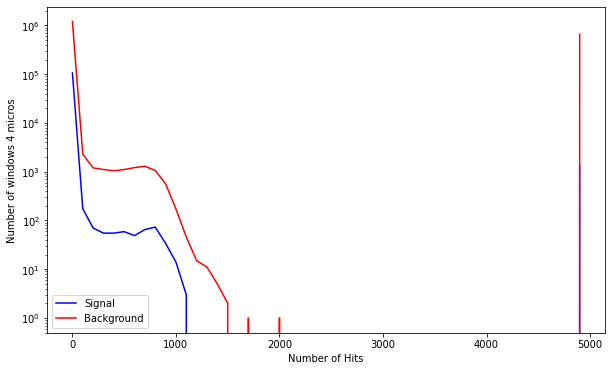

In [107]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0, 5000, bin_hist), hist_nHits_sig, label='Signal', color='blue')
plt.plot(np.arange(0, 5000, bin_hist), hist_nHits_bkg, label='Background', color='red')
plt.xlabel('Number of Hits')
plt.ylabel('Number of windows 4 micros')
plt.yscale('log')
plt.legend()
plt.show()

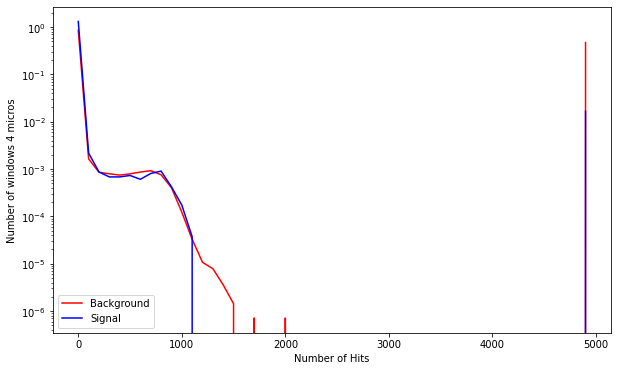

In [108]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0, 5000, bin_hist), hist_nHits_bkg/(11113*126), label='Background', color='red')
plt.plot(np.arange(0, 5000, bin_hist), hist_nHits_sig/(1185*68), label='Signal', color='blue')
plt.xlabel('Number of Hits')
plt.ylabel('Number of windows 4 micros')
plt.yscale('log')
plt.legend()
plt.show()